In [1]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constantes
P = 400 # Compresion de la Carga - Constante de Franja
T = 10*10**-3 # Grosor
#T = 0.05
#R = 25*10**-3  # Radio
R = 0.05
C = 4.5*10**-12
#C = 4.38*10**-12
#lamda = 532*10**-9
lamda = 560*10**-9
#a = R/2
a = 0.025

In [3]:
sigma_xx = np.zeros((513, 513),dtype='float')
sigma_yy = np.zeros((513, 513),dtype='float')
tau_xy = np.zeros((513, 513),dtype='float')

rr = np.zeros((513, 513),dtype='float')
teta = np.zeros((513, 513),dtype='float')

In [4]:
# Genera valores para el radio
xc = np.linspace(-1*R, R, num=514)
yc = xc
xx, yy = np.meshgrid(xc,yc)

In [5]:
yy = np.rot90(yy, k=2, axes=(0,1))

In [7]:
# Crea sigma_xx, sigma_yy, tau_xy
# Crea sigma_xx_1, sigma_yy_1, tau_xy_1
# Crea sigma_xx_2, sigma_yy_2, tau_xy_2

Factor1 = (2*P)/(np.pi*T)

for j in range(513):
    for k in range(513):
        
        x = xx.item((j,k))
        y = yy.item((j,k))
        
        #rr[j,k] = np.sqrt(x**2 + y**2)
        #teta[j,k] = np.arccos(0/rr[j,k])
        #phi[j,k] = np.arctan2(y,x)
        
        rr[j,k] = np.sqrt(x**2 + y**2)
        teta[j,k] = np.arctan2(y,x)
        
        den1 = ((x**2) + ((x - y)**2))**2
        den2 = ((x**2) + ((x + y)**2))**2    
        
        r = np.sqrt(x**2 + y**2)
        
        if r <= a :
            
            tau_xy[j,k] = 0
            sigma_xx[j,k] = 0
            sigma_xx[j,k] = 0
        
        elif r > a :            
            
            sigma_xx[j,k] = -1*Factor1*((((R - y)*(x**2))/(den1)) + (((R + y)*(x**2))/(den2)) - (1/(2*R)))
            sigma_yy[j,k] = -1*Factor1*((((R - y)**3)/(den1)) + (((R + y)**3)/(den2)) - (1/(2*R)))
            tau_xy[j,k] = Factor1*(((((R - y)**2)*x)/(den1)) - ((((R + y)**2)*x)/(den2)))


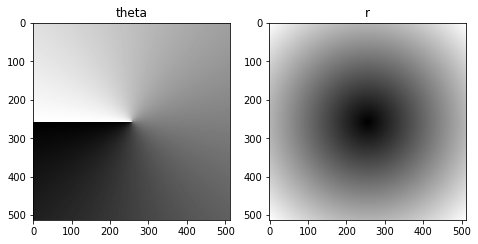

In [8]:
plt.subplots(figsize = (12,6))

plt.subplot(131)
plt.imshow(teta, cmap = 'gray')
plt.title('theta')

plt.subplot(132)
plt.imshow(rr, cmap = 'gray')
plt.title('r')
plt.show()

In [9]:
suma = (sigma_xx + sigma_yy)/2
resta = (sigma_xx - sigma_yy)/2

In [9]:
sigma_rr = suma * (1-(a/rr)**2) + (1-4*(a/rr)**2+3*(a/rr)**4) * ((resta)*np.cos(2*teta) + tau_xy*np.sin(2*teta))
sigma_teta = suma * (1-(a/rr)**2) - (1+3*(a/rr)**4) * ((resta) * np.cos(2*teta)+tau_xy * np.sin(2*teta))
sigma_rr_teta = (1+2*(a/rr)**2 - 3*(a/rr)**4) * ((sigma_yy-sigma_xx)/2 * np.sin(2*teta) + tau_xy*np.cos(2*teta))

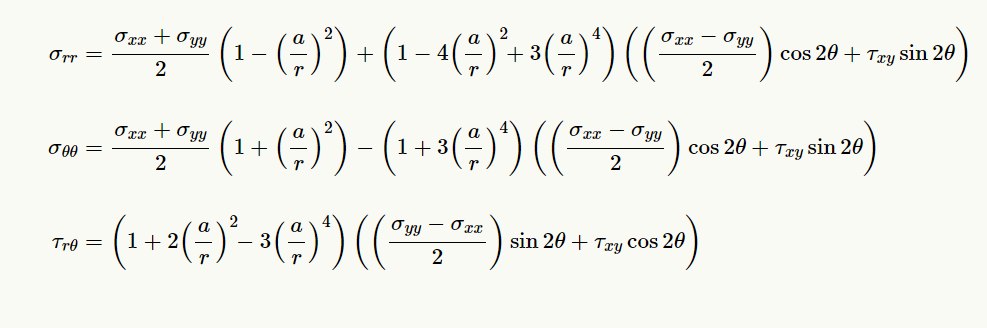

In [ ]:
#Ar = suma * (1-(a/rr)**2) + (1-4*(a/rr)**2+3*(a/rr)**4) * ((resta)*np.cos(2*teta) + tau_xy*np.sin(2*teta))
#Ateta = suma * (1-(a/rr)**2) - (1+3*(a/rr)**4) * ((resta) * np.cos(2*teta)+tau_xy * np.sin(2*teta))
#A_rt = (1+2*(a/rr)**2 - 3*(a/rr)**4) * ((resta) * np.sin(2*teta) + tau_xy*np.cos(2*teta))

sigma_rr = sigma_xx * np.cos(teta)**2 + sigma_yy*np.sin(teta)**2 + tau_xy*np.sin(2*teta)
sigma_teta = sigma_xx * np.sin(teta)**2 + sigma_yy*np.cos(teta)**2 + tau_xy*np.sin(2*teta)
sigma_rr_teta = np.sin(teta)*np.cos(teta) *(sigma_yy - sigma_xx) + tau_xy*np.cos(2*teta)

matrix = np.array([[np.cos(teta)**2, np.sin(teta)**2, -2*np.cos(teta)*np.sin(teta)],
                   [np.sin(teta)**2, np.cos(teta)**2, 2*np.cos(teta)*np.sin(teta)],
                   [np.cos(teta)*np.sin(teta), -np.cos(teta)*np.sin(teta), np.cos(teta)**2-np.sin(teta)**2]])


sigma_x = sigma_rr * matrix[0,0] + sigma_teta * matrix[0,1] + sigma_rr_teta * matrix[0,2]
sigma_y = sigma_rr * matrix[1,0] + sigma_teta * matrix[1,1] + sigma_rr_teta * matrix[1,2] 
tau_xy = sigma_rr * matrix[2,0] + sigma_teta * matrix[2,1] + sigma_rr_teta * matrix[2,2]

In [ ]:
sigma_rr = sigma_xx * np.cos(teta)**2 + sigma_yy*np.sin(teta)**2 + tau_xy*np.sin(2*teta)
sigma_teta = sigma_xx * np.sin(teta)**2 + sigma_yy*np.cos(teta)**2 + tau_xy*np.sin(2*teta)
sigma_rr_teta = np.sin(teta)*np.cos(teta) *(sigma_yy - sigma_xx) + tau_xy*np.cos(2*teta)

matrix = np.array([[np.cos(teta), -rr*np.sin(teta), 0],
                   [np.sin(teta), rr*np.cos(teta), 0],
                   [0, 0, 1]])


sigma_x = sigma_rr * matrix[0,0] + sigma_teta * matrix[0,1] + sigma_rr_teta * matrix[0,2]
sigma_y = sigma_rr * matrix[1,0] + sigma_teta * matrix[1,1] + sigma_rr_teta * matrix[1,2] 
tau_xy = sigma_rr * matrix[2,0] + sigma_teta * matrix[2,1] + sigma_rr_teta * matrix[2,2]

In [ ]:
sigma_rr = suma * (1-(a/rr)**2) + (1-4*(a/rr)**2+3*(a/rr)**4) * ((resta)*np.cos(2*teta) + tau_xy*np.sin(2*teta))
sigma_teta = suma * (1-(a/rr)**2) - (1+3*(a/rr)**4) * ((resta) * np.cos(2*teta)+tau_xy * np.sin(2*teta))
sigma_rr_teta = (1+2*(a/rr)**2 - 3*(a/rr)**4) * ((resta) * np.sin(2*teta) + tau_xy*np.cos(2*teta))

matrix = np.array([[np.cos(teta), -np.sin(teta), 0],
                   [np.sin(teta), np.cos(teta), 0],
                   [0, 0, 1]])


sigma_x = sigma_rr * matrix[0,0] + sigma_teta * matrix[0,1] + sigma_rr_teta * matrix[0,2]
sigma_y = sigma_rr * matrix[1,0] + sigma_teta * matrix[1,1] + sigma_rr_teta * matrix[1,2] 
tau_xy = sigma_rr * matrix[2,0] + sigma_teta * matrix[2,1] + sigma_rr_teta * matrix[2,2]


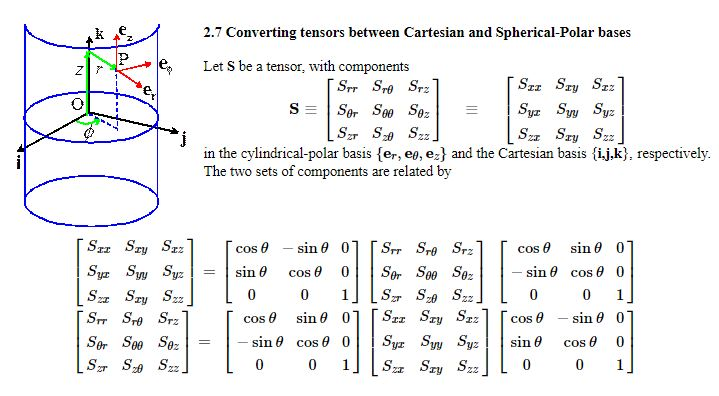

In [22]:
sigma_rr = (suma) *(1-(a/rr)**2) + (resta) * (1-4*(a/rr)**2+3*(a/rr)**4)*np.cos(2*teta)
sigma_teta = (suma) * (1+(a/rr)**2) - (resta) * (1+3*(a/rr)**4) * np.cos(2*teta)
sigma_rr_teta = -(sigma_xx-sigma_yy)/2* (1+2*(a/rr)**2 - 3*(a/rr)**4) * np.sin(2*teta)

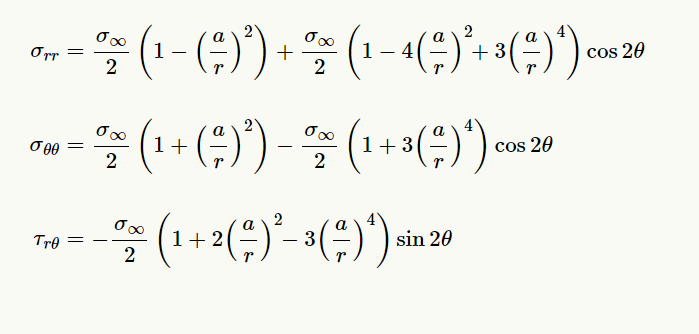

In [9]:
sigma_rr1 = (suma + resta) * np.cos(2*teta)
sigma_teta1 = (suma - resta) * np.cos(2*teta)
sigma_rr_teta1 = -(suma) * np.sin(2*teta)

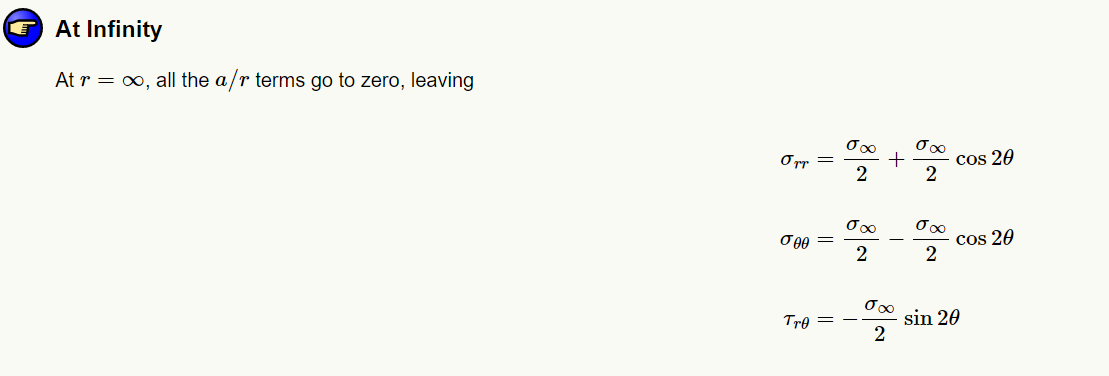

In [10]:
sigma_rr2 = 0
sigma_teta2 = sigma_yy * (1 - 2*np.cos(2*teta))
sigma_rr_teta2 = 0

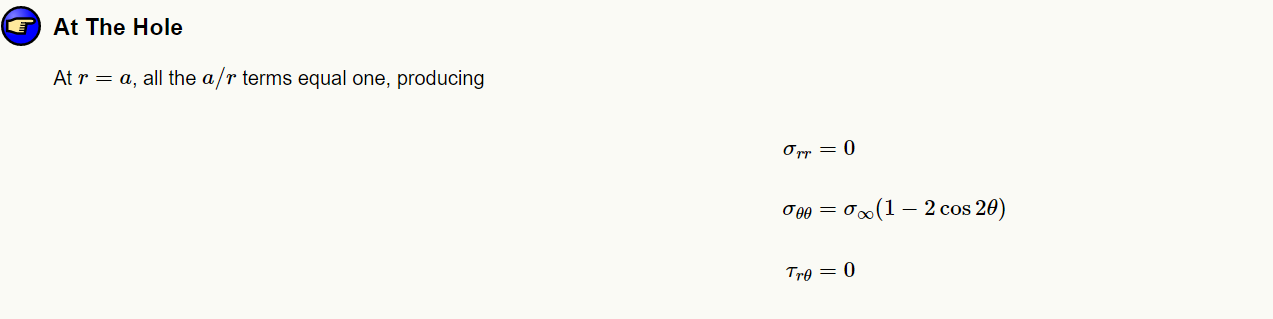

In [21]:
sigma_rr1 = suma * (1- (a/rr)**2)
sigma_teta1 = suma * (1+ (a/rr)**2)
sigma_rr_teta1 = 0

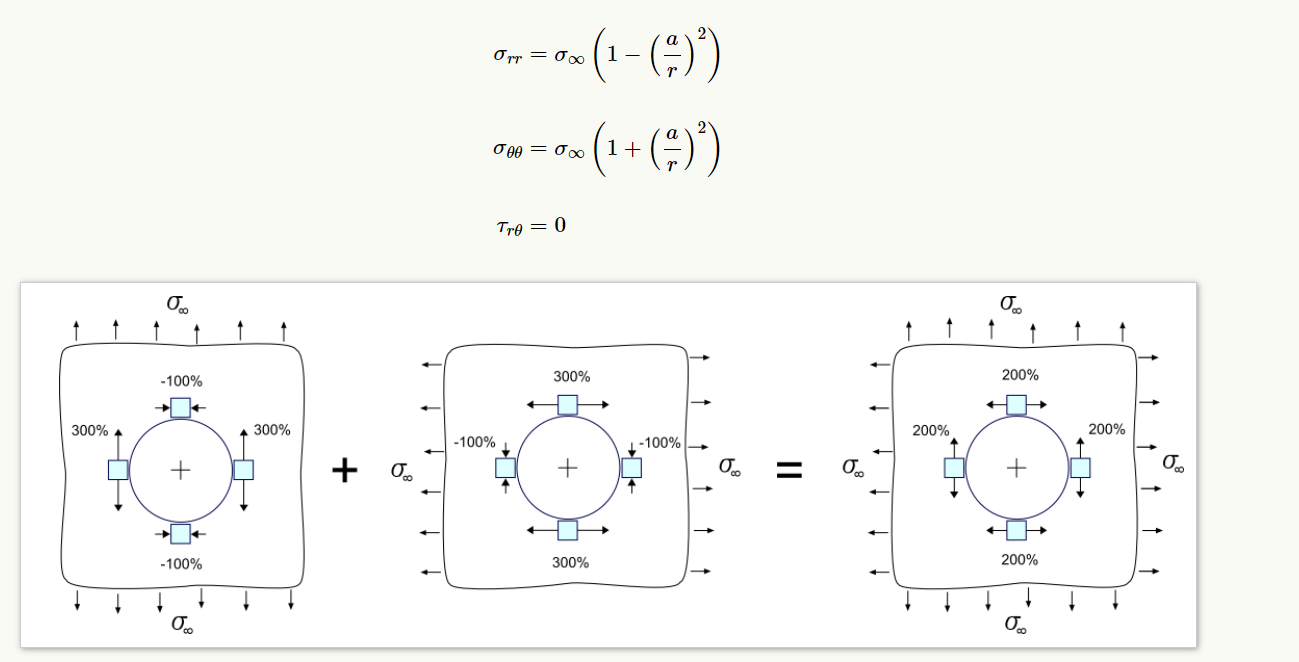

In [16]:
sigma_rr3 = sigma_rr - sigma_rr1
sigma_teta3 = sigma_teta - sigma_teta1
sigma_rr_teta3 = sigma_rr_teta - sigma_rr_teta1

In [46]:
sigma_x1 = sigma_rr1*np.cos(teta)**2 + sigma_teta1*np.sin(teta)**2 - sigma_rr_teta1*np.sin(2*teta)
sigma_y1 = sigma_rr1 * np.sin(teta)**2 + sigma_teta1*np.cos(teta)**2 + sigma_rr_teta1*np.sin(2*teta)
sigma_xy1 = np.sin(teta)*np.cos(teta) *(sigma_rr1 - sigma_teta1) + sigma_rr_teta1*np.cos(2*teta)

#sigma_x2 = sigma_rr2*np.cos(teta)**2 + sigma_teta2*np.sin(teta)**2 - sigma_rr_teta2*np.sin(2*teta)
#sigma_y2 = sigma_rr2 * np.sin(teta)**2 + sigma_teta2*np.cos(teta)**2 + sigma_rr_teta2*np.sin(2*teta)
#sigma_xy2 = np.sin(teta)*np.cos(teta) *(sigma_rr2 - sigma_teta2) + sigma_rr_teta2*np.cos(2*teta)

sigma_x3 = sigma_rr*np.cos(teta)**2 + sigma_teta*np.sin(teta)**2 - sigma_rr_teta*np.sin(2*teta)
sigma_y3 = sigma_rr * np.sin(teta)**2 + sigma_teta*np.cos(teta)**2 + sigma_rr_teta*np.sin(2*teta)
sigma_xy3 = np.sin(teta)*np.cos(teta) *(sigma_rr - sigma_teta) + sigma_rr_teta*np.cos(2*teta)

In [47]:
sigma_11 = ((sigma_x1 + sigma_y1)/2) + np.sqrt((((sigma_x1 - sigma_y1)/2)**2) + (sigma_xy1)**2)     
sigma_22 = ((sigma_x1+ sigma_y1)/2) - np.sqrt((((sigma_x1 - sigma_y1)/2)**2) + (sigma_xy1)**2)

#sigma_33 = ((sigma_x2 + sigma_y2)/2) + np.sqrt((((sigma_x2 - sigma_y2)/2)**2) + (sigma_xy2)**2)     
#sigma_44 = ((sigma_x2+ sigma_y2)/2) - np.sqrt((((sigma_x2 - sigma_y2)/2)**2) + (sigma_xy2)**2)

sigma_55 = ((sigma_x3 + sigma_y3)/2) + np.sqrt((((sigma_x3 - sigma_y3)/2)**2) + (sigma_xy3)**2)     
sigma_66 = ((sigma_x3+ sigma_y3)/2) - np.sqrt((((sigma_x3 - sigma_y3)/2)**2) + (sigma_xy3)**2)

In [48]:
delta1 = 2*np.pi*T*C*(sigma_11 - sigma_22) / (lamda) # P
I1 = (1+np.cos(delta1))/2

#delta2 = 2*np.pi*T*C*(sigma_33 - sigma_44) / (lamda) # P
#I2 = (1+np.cos(delta2))/2

delta3 = 2*np.pi*T*C*(sigma_55 - sigma_66) / (lamda) # P
I3 = (1+np.cos(delta3))/2

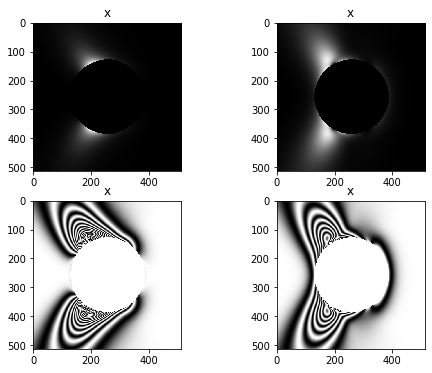

In [49]:
plt.subplots(figsize = (8,6))

plt.subplot(221)
plt.imshow(delta1, cmap = 'gray')
plt.title('x')

plt.subplot(222)
plt.imshow(delta3, cmap = 'gray')
plt.title('x')

plt.subplot(223)
plt.imshow(I1, cmap = 'gray')
plt.title('x')

plt.subplot(224)
plt.imshow(I3, cmap = 'gray')
plt.title('x')

plt.show()

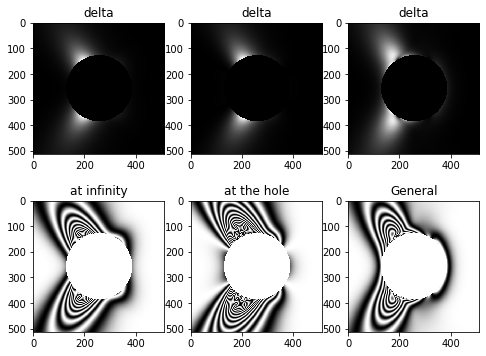

In [14]:
plt.subplots(figsize = (8,6))

plt.subplot(231)
plt.imshow(delta1, cmap = 'gray')
plt.title('delta')

plt.subplot(232)
plt.imshow(delta2, cmap = 'gray')
plt.title('delta')

plt.subplot(233)
plt.imshow(delta3, cmap = 'gray')
plt.title('delta')

plt.subplot(234)
plt.imshow(I1, cmap = 'gray')
plt.title('at infinity')

plt.subplot(235)
plt.imshow(I2, cmap = 'gray')
plt.title('at the hole')

plt.subplot(236)
plt.imshow(I3, cmap = 'gray')
plt.title('General')
plt.show()

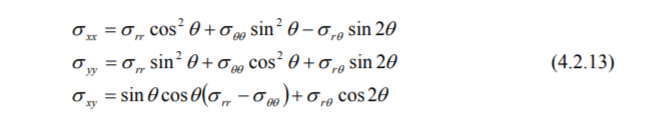

In [ ]:
sigma_x = sigma_rr3*np.cos(teta)**2 + sigma_teta3*np.sin(teta)**2 - sigma_rr_teta3*np.sin(2*teta)
sigma_y = sigma_rr3*np.sin(teta)**2 + sigma_teta3*np.cos(teta)**2 + sigma_rr_teta3*np.sin(2*teta)
sigma_xy = np.sin(teta)*np.cos(teta) *(sigma_rr3 - sigma_teta3) + sigma_rr_teta3*np.cos(2*teta)

In [24]:
sigma_x = sigma_rr*np.cos(teta)**2 + sigma_teta*np.sin(teta)**2 - sigma_rr_teta*np.sin(2*teta)
sigma_y = sigma_rr*np.sin(teta)**2 + sigma_teta*np.cos(teta)**2 + sigma_rr_teta*np.sin(2*teta)
sigma_xy = np.sin(teta)*np.cos(teta) *(sigma_rr - sigma_teta) + sigma_rr_teta*np.cos(2*teta)

In [25]:
sigma_1 = ((sigma_x + sigma_y)/2) + np.sqrt((((sigma_x - sigma_y)/2)**2) + (sigma_xy)**2)     
sigma_2 = ((sigma_x + sigma_y)/2) - np.sqrt((((sigma_x - sigma_y)/2)**2) + (sigma_xy)**2)

In [26]:
delta = 2*np.pi*T*C*(sigma_1 - sigma_2) / (lamda) # P
I1 = (1+np.cos(delta))/2

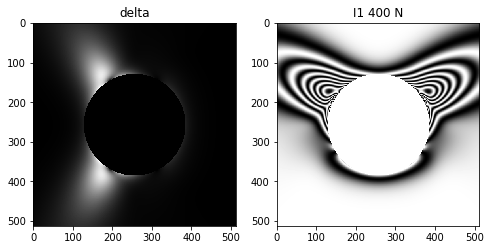

In [27]:
plt.subplots(figsize = (8,6))

plt.subplot(121)
plt.imshow(delta, cmap = 'gray')
plt.title('delta')
# con phi
plt.subplot(122)
plt.imshow(I1.T, cmap = 'gray')
plt.title('I1 400 N')
plt.show()

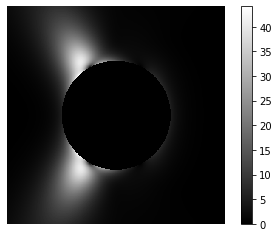

In [28]:
fig,ax = plt.subplots()
delta = ax.matshow(delta, cmap='gray')
fig.colorbar(delta)
plt.axis('off')
plt.show()

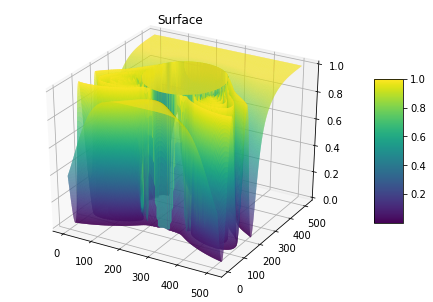

In [22]:
X,Y = np.mgrid[0:513, 0:513]
fig = plt.figure()
ax = Axes3D(fig)
surface = ax.plot_surface(X, Y, I1, rstride=1, cstride=1, cmap='viridis')
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.title('Surface')
plt.show()